## NYC AIRBNB

Case study of clusterization. [This Dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) describes the listing activity and metrics in NYC, NY for 2019.
 <br>
#
***
## Table of contents
1. [Data analysis](#1.-Data-analysis)
2. [Features scatterplot](#2.-Features-scatterplot)
3. [KMeans](#3.-KMeans)
4. [Analysing clusters count](#4.-Analysing-clusters-count) <br>
 4.1 [Basic data](#4.1-Basic-data) <br>
 4.2 [Boxplots](#4.2-Boxplots) <br>
 4.3 [Scatterplots](#4.3-Scatterplots) <br>
5. [Conclusions](#5.-Conclusions) <br>
<br>  
***

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("AB_NYC_2019.csv")

##### [back to 'Table of contents'](##Table-of-contents)
***
#### 1. Data analysis

In [175]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Selecting important features for clusterization

In [114]:
features = ["price", "number_of_reviews", "calculated_host_listings_count", "minimum_nights"]
dfd = df[["latitude", "longitude"] + features ]
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   number_of_reviews               48895 non-null  int64  
 4   calculated_host_listings_count  48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.2 MB


Function for ploting scattered data on 'map'

In [115]:
def scatter_plot (target_col_name, title=None, plot_size=(27,15), size_div=500):
    plt.figure(figsize=plot_size)
    plt.scatter(dfd["latitude"], dfd["longitude"], s=dfd[target_col_name]/size_div, c=dfd[target_col_name], cmap='tab20c_r', alpha = .75)
    plt.colorbar(shrink=0.75, pad=.01, label=target_col_name)
    if title == None:
        plt.title(str(target_col_name).replace("_"," ").upper())
    else:
        plt.title(title.upper());

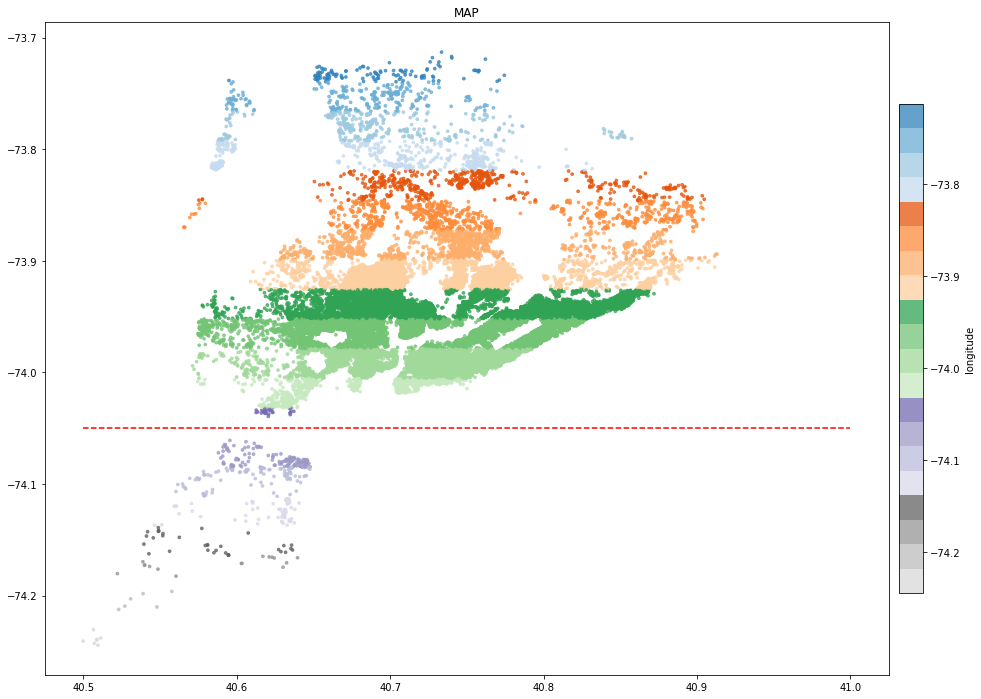

In [116]:
scatter_plot("longitude", "map", (18,12), -10)
plt.plot([40.5,41],[-74.05,-74.05], 'r--');

_cuting off bottom part of 'map' for better visaulization_

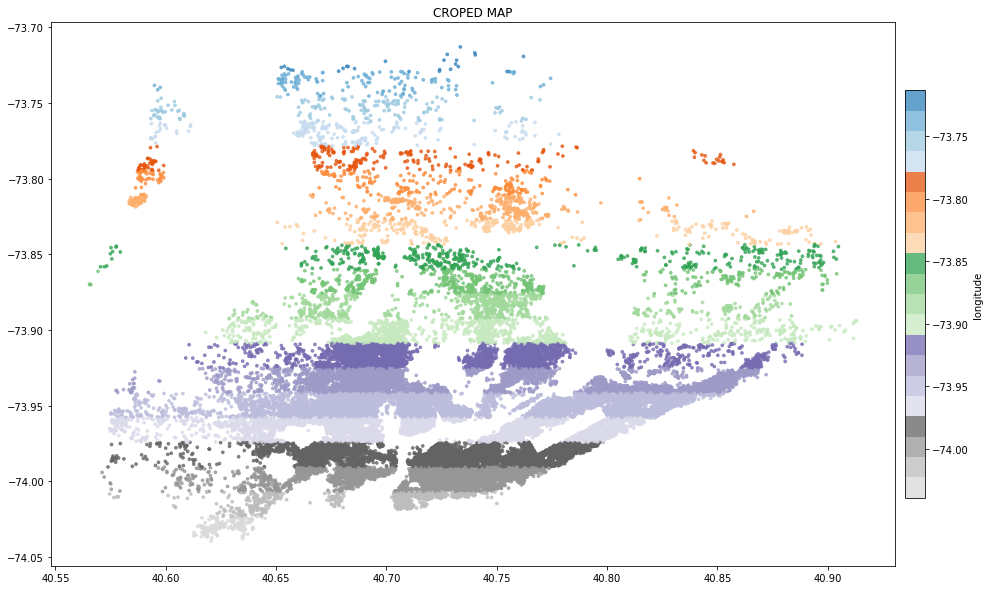

In [117]:
dfd = dfd[dfd['longitude']>-74.05]
scatter_plot("longitude", "croped map", (18,10), -10)

##### [back to 'Table of contents'](##Table-of-contents)
***
#### 2. Features scatterplot

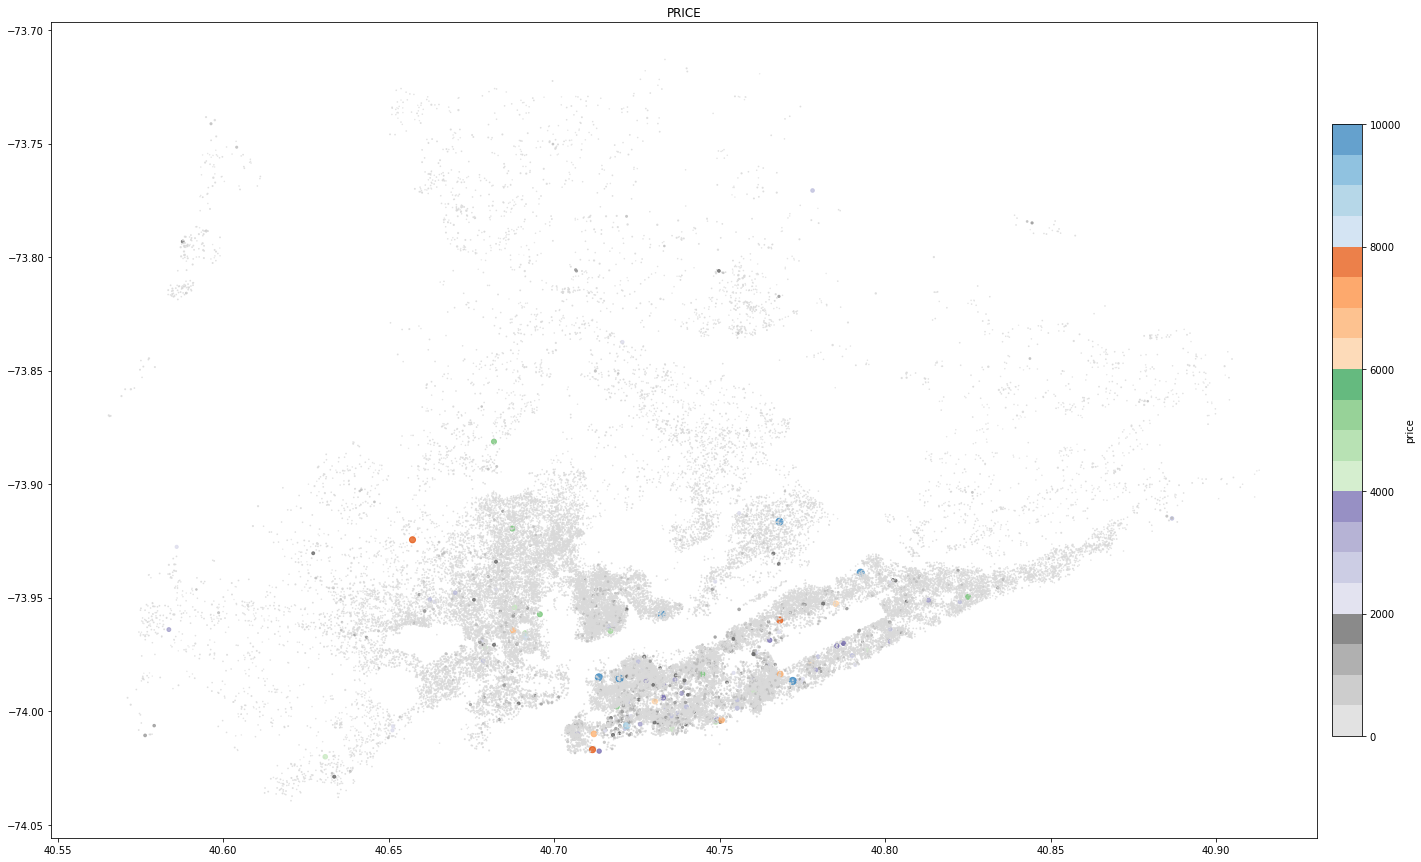

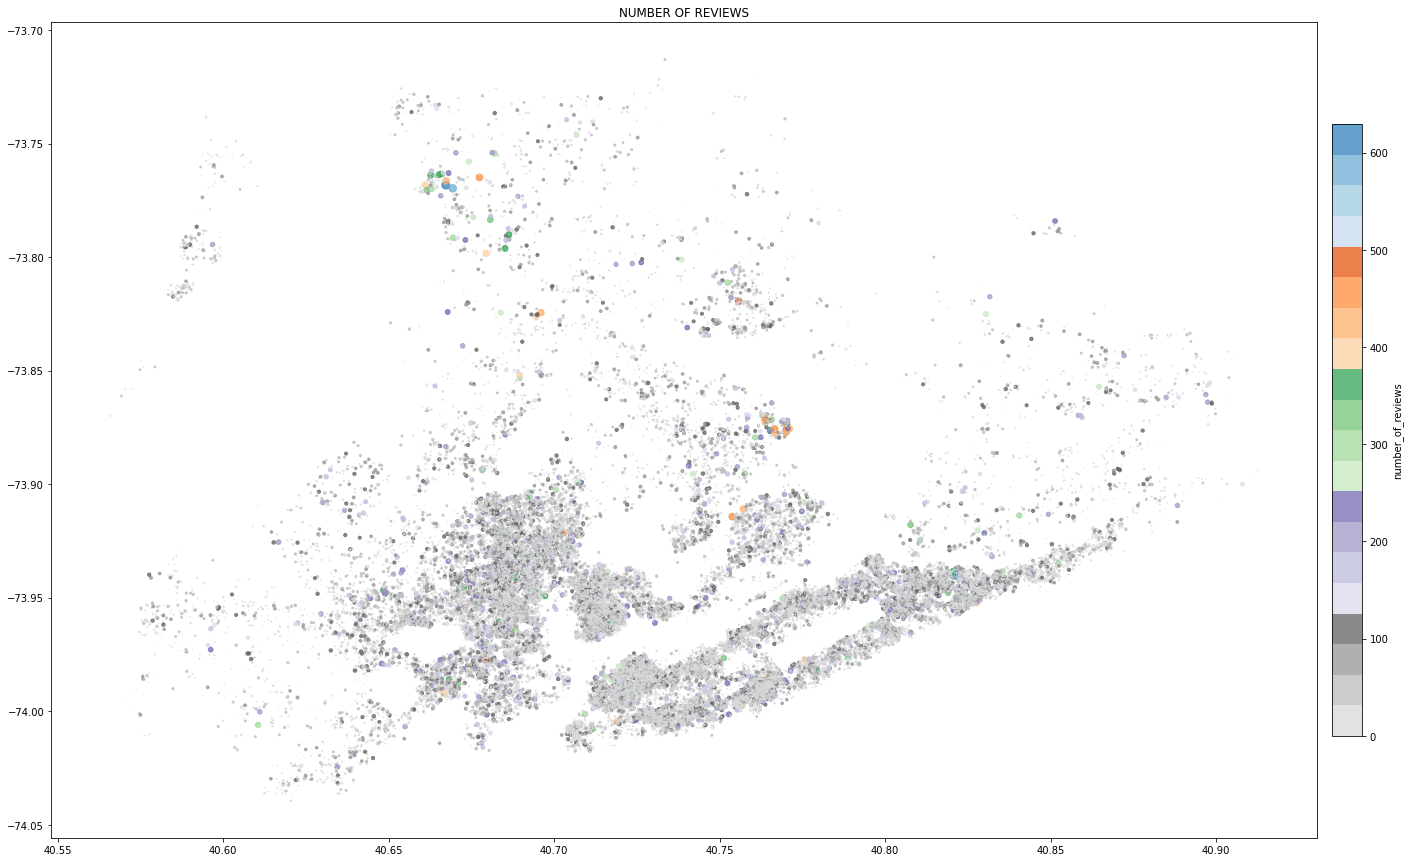

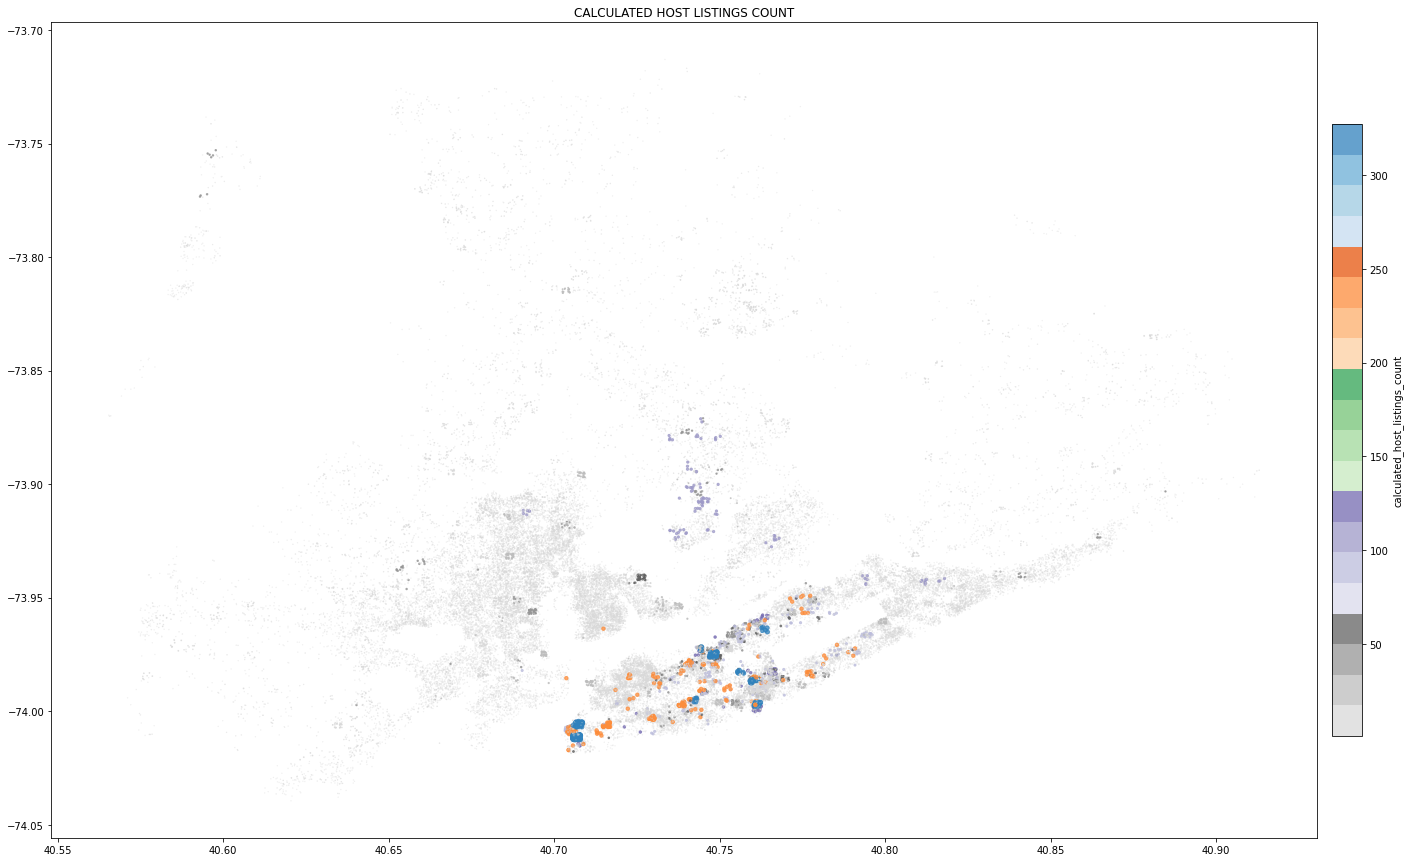

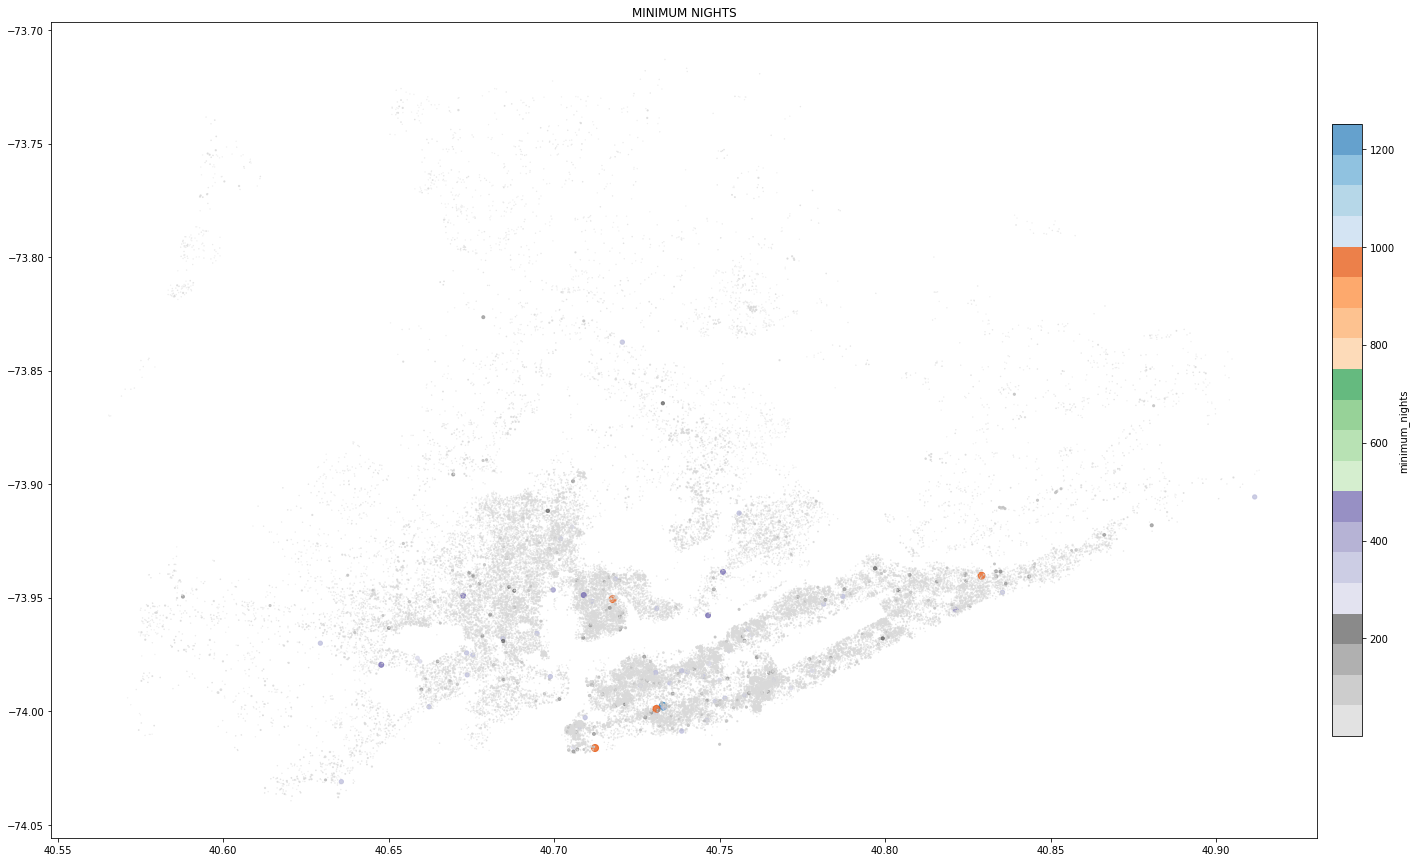

In [118]:
div = [200, 10, 20, 20]
for f in features:
    scatter_plot(f, size_div=div[features.index(f)])

##### [back to 'Table of contents'](##Table-of-contents)
***
#### 3. KMeans

In [119]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Data standardization

In [120]:
scal = MinMaxScaler()
dfs = pd.DataFrame(scal.fit_transform(dfd), columns = dfd.columns)
dfs.head()

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,minimum_nights
0,0.235990,0.205404,0.0149,0.014308,0.015337,0.000000
1,0.541312,0.170481,0.0225,0.071542,0.003067,0.000000
2,0.700690,0.298747,0.0150,0.000000,0.000000,0.001601
3,0.344304,0.244034,0.0089,0.429253,0.000000,0.000000
4,0.670455,0.292344,0.0080,0.014308,0.000000,0.007206


In [121]:
dfs = dfs.drop(columns=["latitude","longitude"])
dfs.head()

,price,number_of_reviews,calculated_host_listings_count,minimum_nights
0,0.0149,0.014308,0.015337,0.000000
1,0.0225,0.071542,0.003067,0.000000
2,0.0150,0.000000,0.000000,0.001601
3,0.0089,0.429253,0.000000,0.000000
4,0.0080,0.014308,0.000000,0.007206


##### [back to 'Table of contents'](##Table-of-contents)
***
#### 4. Analysing clusters count

   - elbow method

In [122]:
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(dfs)
    distortions.append(km.inertia_)

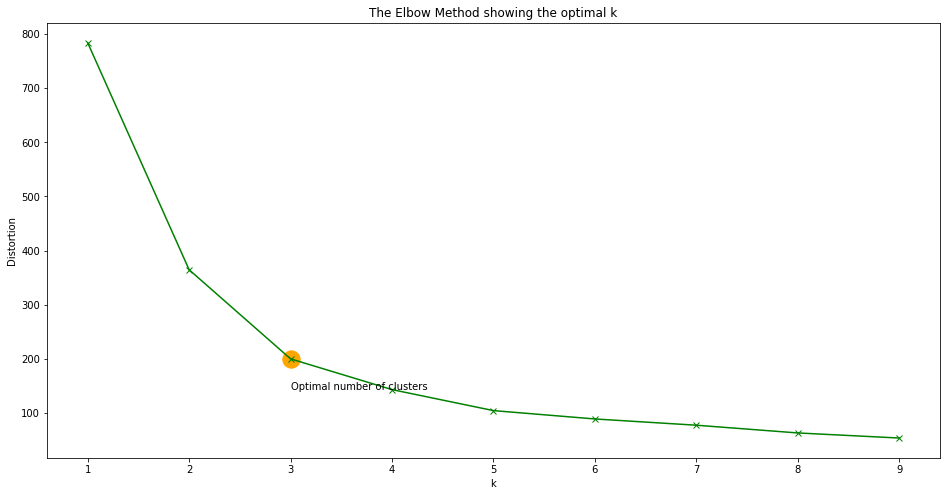

In [174]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'gx-')
k = 3
plt.scatter(x = k, y = distortions[k-1], s = 300, color = "orange")
plt.annotate("Optimal number of clusters", (k, distortions[k]))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show();

In [124]:
max_clusters = 5
clusters_range = range(2,max_clusters+1) # from 2 to 5 (inclusive) clusters
for k in clusters_range:
    kms = KMeans(n_clusters=k).fit(dfs) # fitting scaled data
    dfd[str(k)+"_clusters"] = kms.labels_ # assigning clusters to not scaled DataFrame

_Creating columns for numerous clusters, for further analysis of clusters count and its difference_

In [125]:
dfd.head()

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,minimum_nights,2_clusters,3_clusters,4_clusters,5_clusters
0,40.64749,-73.97237,149,9,6,1,0,0,0,1
1,40.75362,-73.98377,225,45,2,1,0,0,0,0
2,40.80902,-73.94190,150,0,1,3,0,0,0,1
3,40.68514,-73.95976,89,270,1,1,0,2,2,4
4,40.79851,-73.94399,80,9,1,10,0,0,0,1


##### [back to 'Table of contents'](##Table-of-contents)
***
##### 4.1 Basic data

In [157]:
for clust in list(clusters_range):

    columns = features.copy()
    clust_col_name = str(clust) +"_clusters"
    data_info = pd.DataFrame()

    data_info["cluster"] = dfd[clust_col_name].unique()
    data_info["count"] = dfd[[columns[0], clust_col_name]].groupby(clust_col_name).count()
    data_info["%_of_tot"] =  data_info["count"] / dfd[clust_col_name].count() *100
    
    for col in columns:
        
        data_info[col+"-AVG"] = dfd[[col, clust_col_name]].groupby(clust_col_name).mean()
        data_info[col+"-q75"] = dfd[[col, clust_col_name]].groupby(clust_col_name).quantile(.75)
    
    print(f"\nBasic statistic of {clust} clusters")
    display(data_info.sort_values("cluster",ascending=False).round(2))


Basic statistic of 2 clusters


,cluster,count,%_of_tot,price-AVG,price-q75,number_of_reviews-AVG,number_of_reviews-q75,calculated_host_listings_count-AVG,calculated_host_listings_count-q75,minimum_nights-AVG,minimum_nights-q75
1,1,559,1.15,273.93,314.0,2.34,4.0,287.57,327.0,21.15,30.0
0,0,47963,98.85,151.60,175.0,23.46,24.0,3.91,2.0,6.88,5.0



Basic statistic of 3 clusters


,cluster,count,%_of_tot,price-AVG,price-q75,number_of_reviews-AVG,number_of_reviews-q75,calculated_host_listings_count-AVG,calculated_host_listings_count-q75,minimum_nights-AVG,minimum_nights-q75
1,2,559,1.15,273.93,314.0,2.34,4.0,287.57,327.0,21.15,30.0
2,1,4506,9.29,127.97,155.0,137.78,162.0,2.04,2.0,3.28,3.0
0,0,43457,89.56,154.05,175.0,11.61,15.0,4.11,2.0,7.26,5.0



Basic statistic of 4 clusters


,cluster,count,%_of_tot,price-AVG,price-q75,number_of_reviews-AVG,number_of_reviews-q75,calculated_host_listings_count-AVG,calculated_host_listings_count-q75,minimum_nights-AVG,minimum_nights-q75
2,3,4428,9.13,127.97,155.0,138.88,163.0,2.04,2.0,3.29,3.0
1,2,559,1.15,273.93,314.0,2.34,4.0,287.57,327.0,21.15,30.0
3,1,1001,2.06,205.33,239.0,1.76,2.0,80.44,96.0,28.62,30.0
0,0,42534,87.66,152.80,175.0,11.95,16.0,2.31,2.0,6.75,5.0



Basic statistic of 5 clusters


,cluster,count,%_of_tot,price-AVG,price-q75,number_of_reviews-AVG,number_of_reviews-q75,calculated_host_listings_count-AVG,calculated_host_listings_count-q75,minimum_nights-AVG,minimum_nights-q75
2,4,559,1.15,273.93,314.0,2.34,4.0,287.57,327.0,21.15,30.0
3,3,1001,2.06,205.33,239.0,1.76,2.0,80.44,96.0,28.62,30.0
4,2,1481,3.05,121.83,150.0,208.95,229.0,2.05,2.0,2.94,3.0
0,1,6265,12.91,130.94,158.0,79.51,99.0,2.04,2.0,3.62,3.0
1,0,39216,80.82,154.66,175.0,8.05,12.0,2.33,2.0,7.00,5.0


In [170]:
def box_plot_clusters_data(data, columns, clusters):
    clust_col_name = str(clusters) + "_clusters"
    for col in columns:
        plt.figure(figsize=(25, 1 * clusters +1))
        x = []
        for clust in range(0,clusters):
            x.append(np.array(data[col][data[clust_col_name] == clust]))

        plt.boxplot(x = x, widths=0.75, vert=False, labels=range(0,clusters), patch_artist=True, 
                    flierprops=dict(markeredgecolor="lightgray"),
                    medianprops=dict(color="red", linewidth=2.5))
        plt.ylabel("Cluster")
        plt.xlabel(col)
        plt.title(f"{col.upper()} boxplot of {clusters} clusters")
        plt.show()

In [ ]:
def plot_map(df, clusters_n):
    legend = []
    clust_col_name = str(clusters_n) + "_clusters"
    plt.figure(figsize=(25,15))
    colors = ["gold", "red", "green", "blue"]
    for clust in range(0, clusters_n):
        plt.scatter(df[df[clust_col_name]==clust]["latitude"], df[df[clust_col_name]==clust]["longitude"], s=5, color=colors[clust], alpha = .2)
        legend.append(f"class - {clust} color")
    plt.legend(legend, markerscale=5, fontsize= 20)
    plt.title(f"{clusters_n} clusters scatter plot");

##### [back to 'Table of contents'](##Table-of-contents)
***
##### 4.2 Boxplots

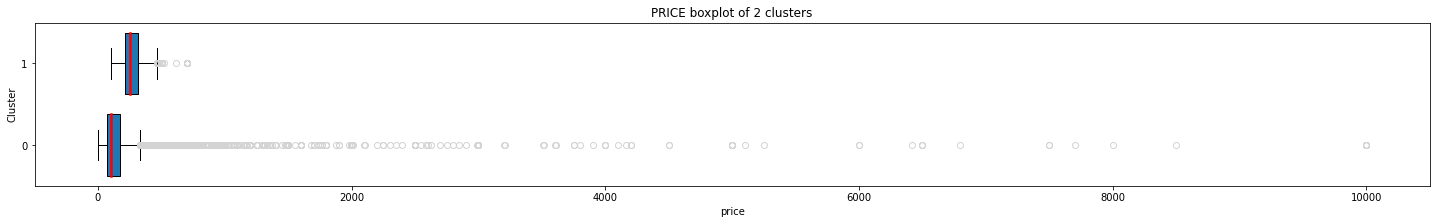

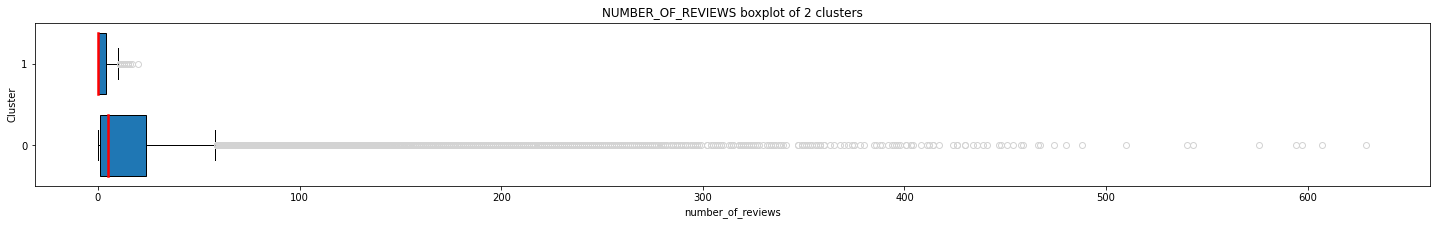

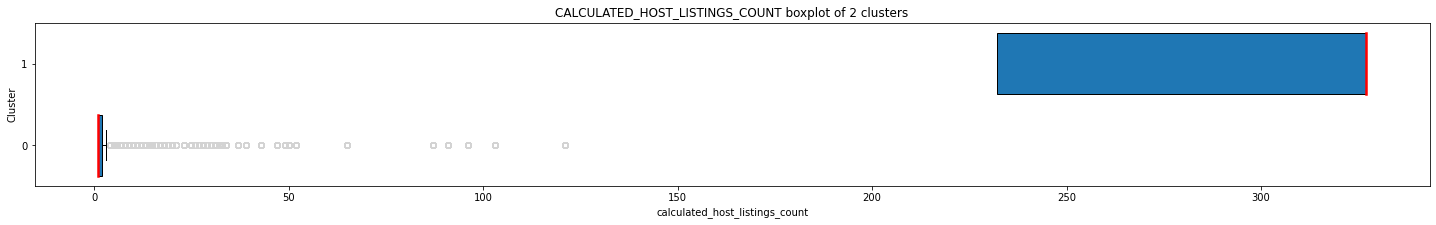

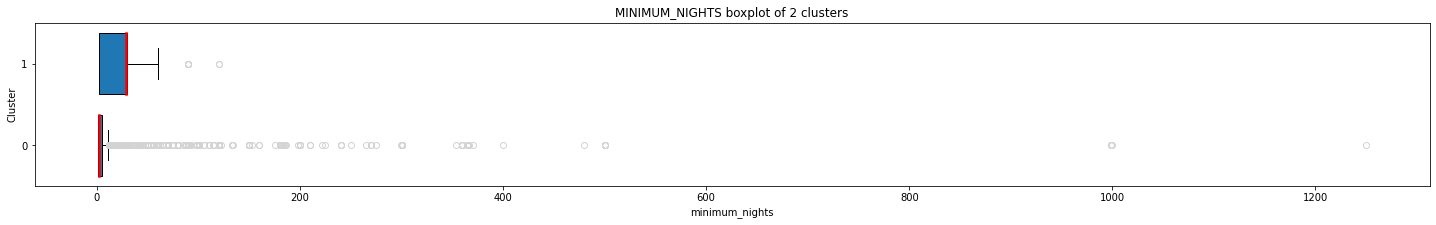

In [171]:
box_plot_clusters_data(dfd, features, 2)

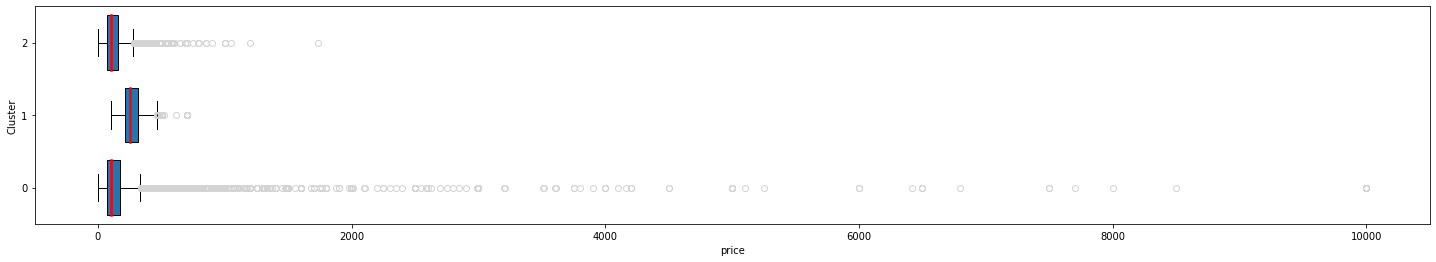

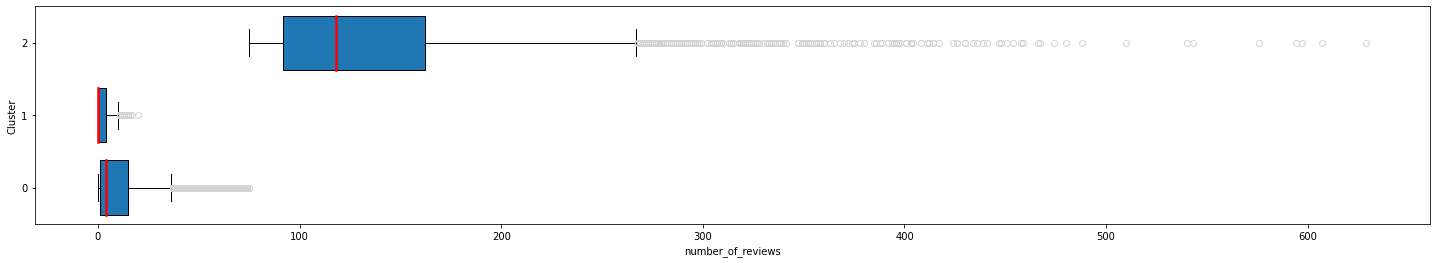

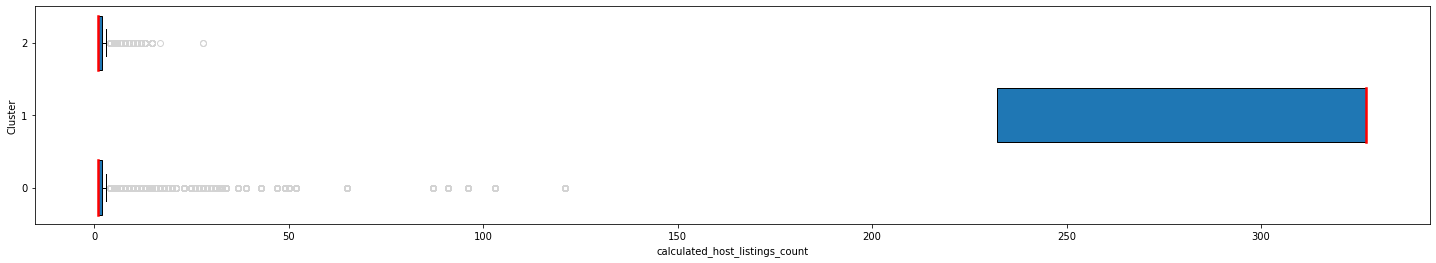

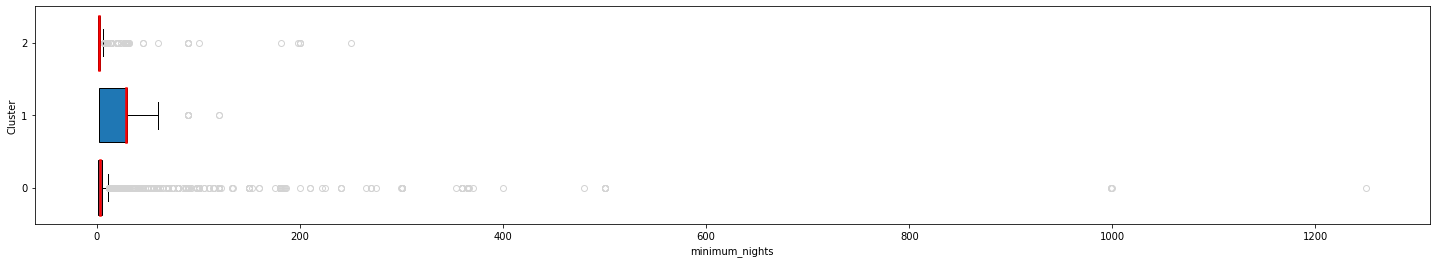

In [108]:
box_plot_clusters_data(dfd, features, 3)

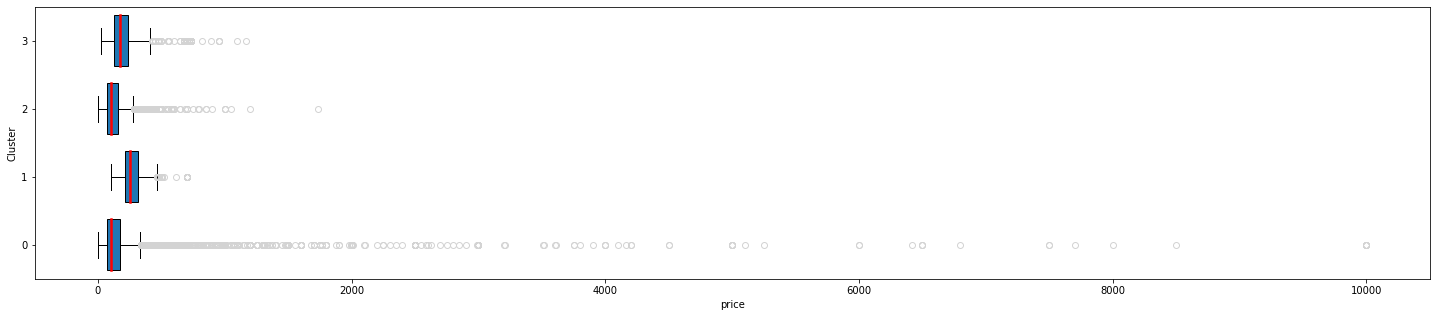

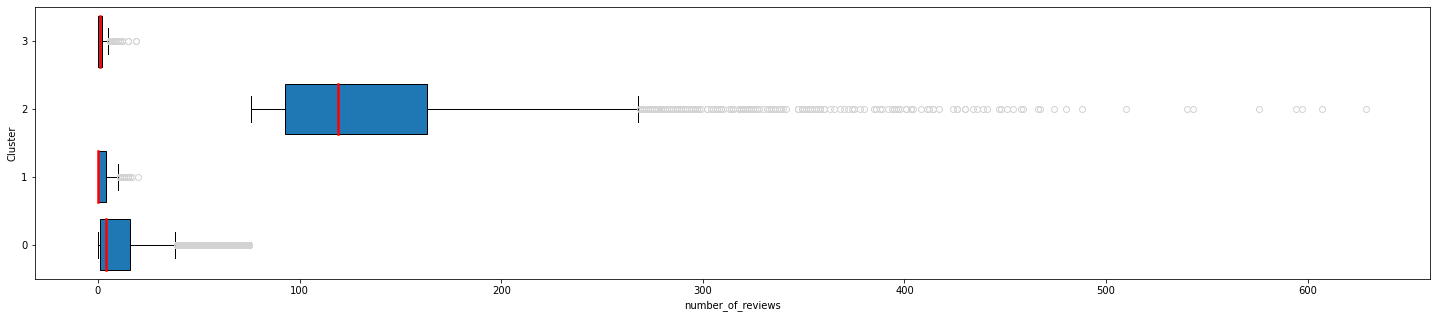

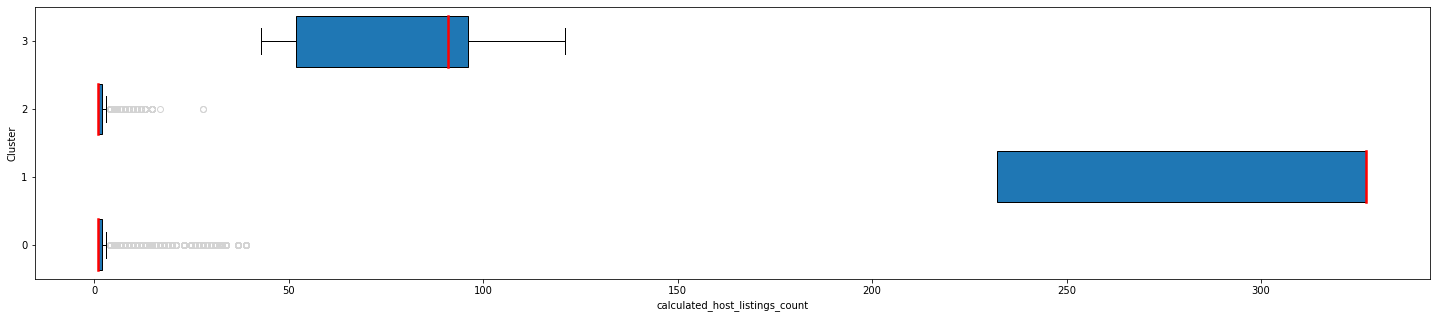

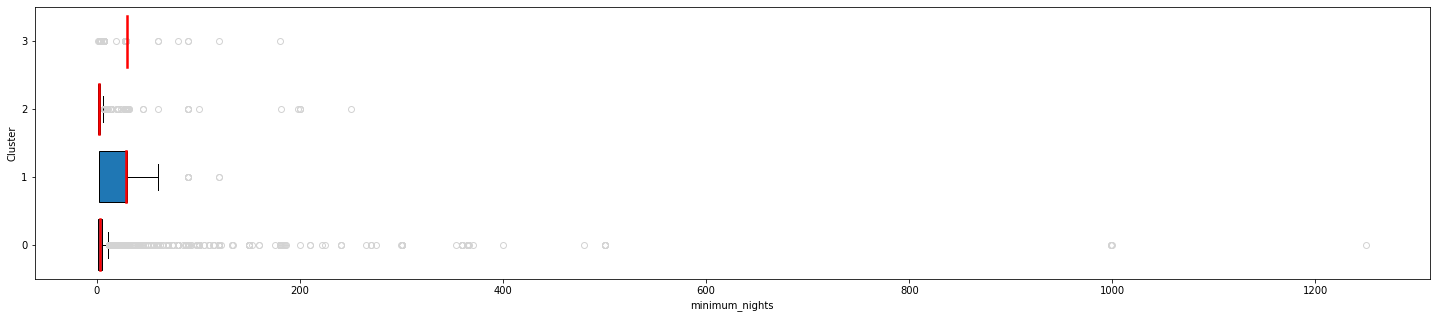

In [109]:
box_plot_clusters_data(dfd, features, 4)

##### [back to 'Table of contents'](##Table-of-contents)
***
##### 4.3 Scatterplots

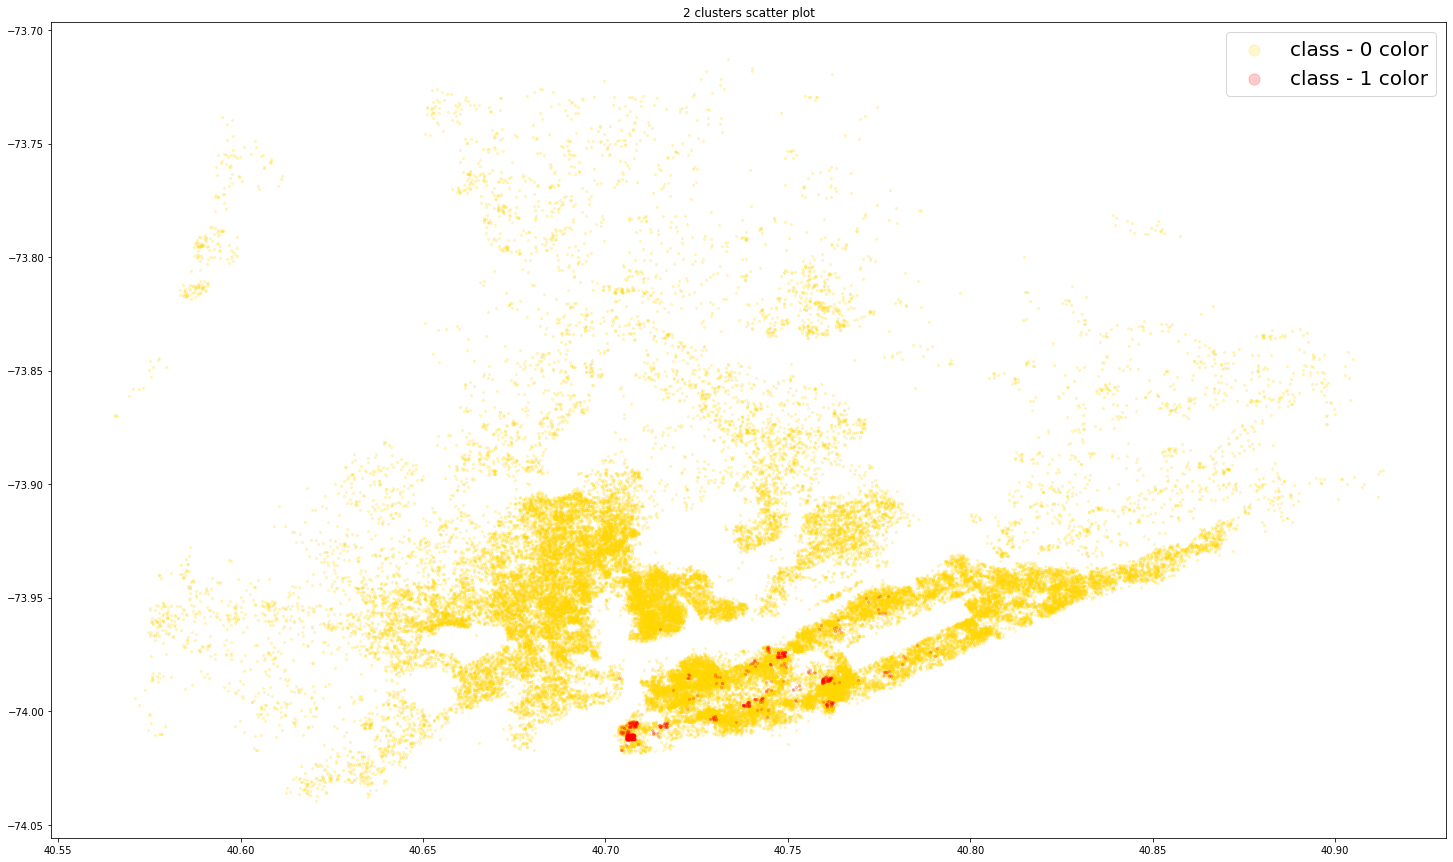

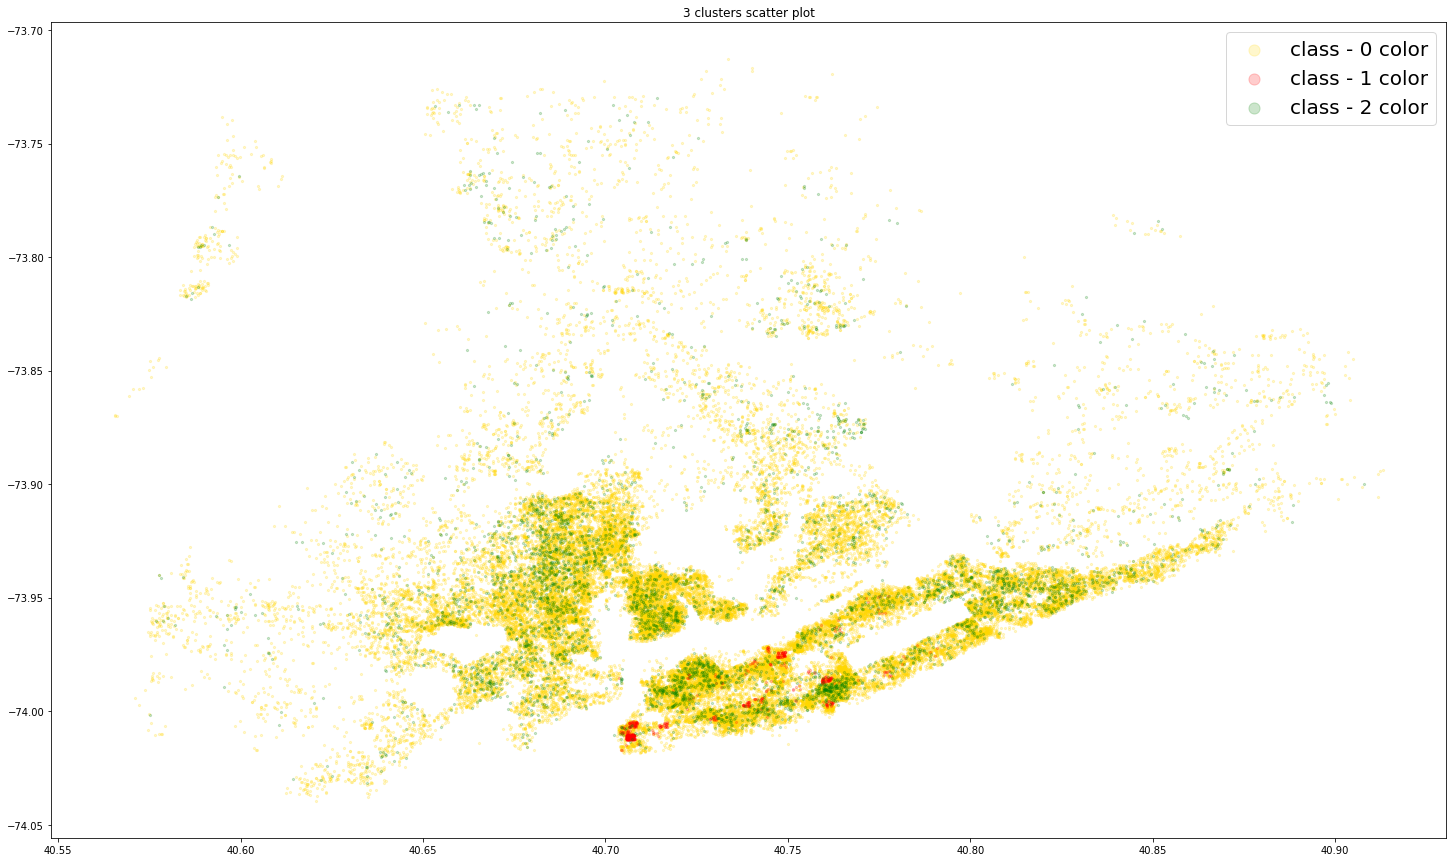

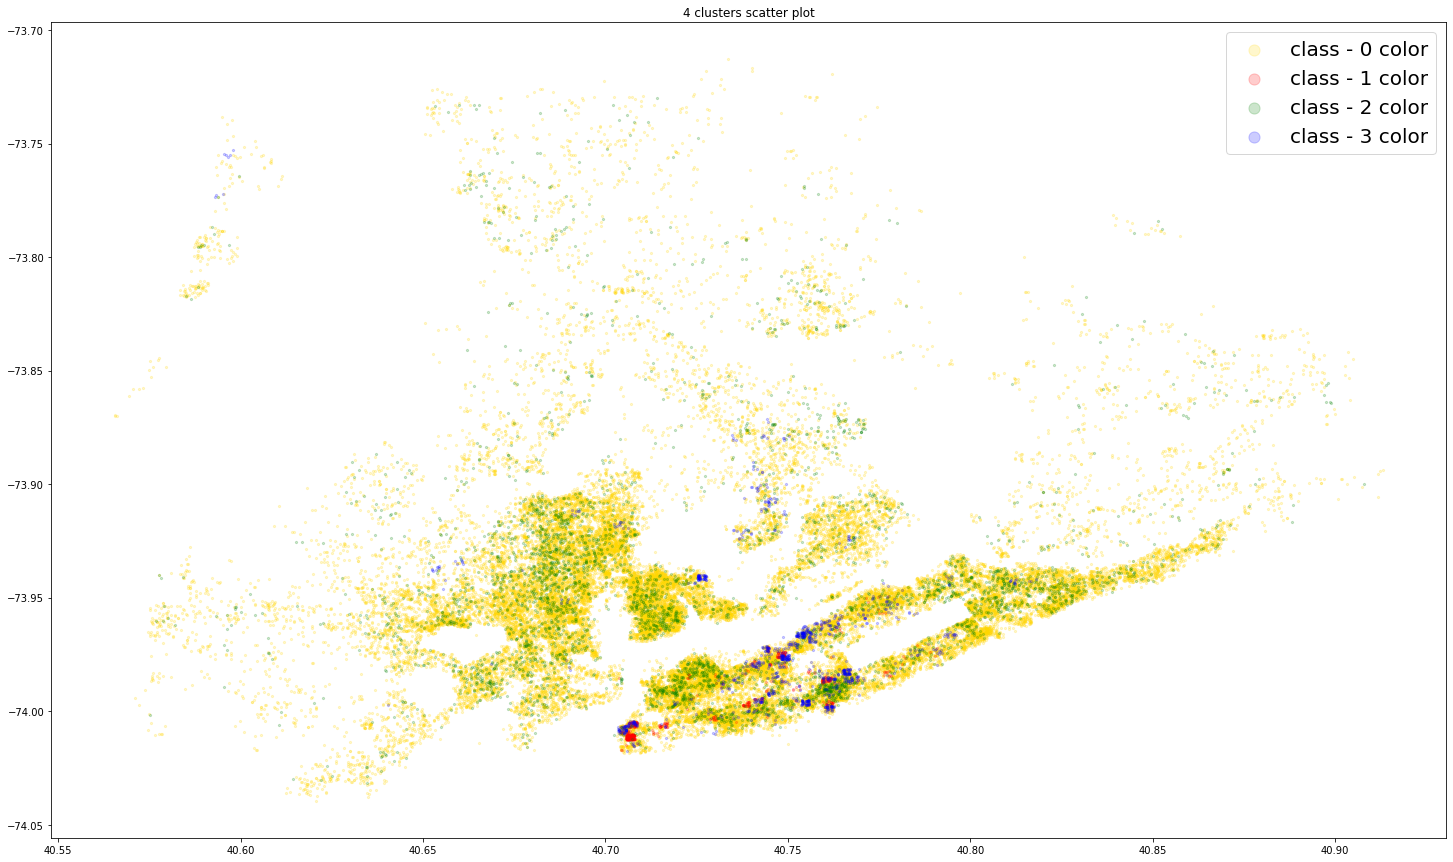

In [167]:
for i in range(2, 4+1):
    plot_map(dfd, i)

##### [back to 'Table of contents'](##Table-of-contents)
***
#### 5. Conclusions
- Dividing data into 2 clusters outputs disproportionate ratio between clusters (1.15% to 98.85%)
- According to 'Elbow method' 3 clusters is optimal number
- Data with 3 clusters splits has better clusters ratio (1.15% to 9.29% to 89.56%)
- 4 clusters data seems to have very similar values for clusters number 1 and 3 - differs significantly only at 'calculated_host_listings_count'
- Clusterization of 5 and more was rejected due algorithm started to split small groups into smaller ones with similar values.